<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%203/MIS710_Lab3-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIS710 Lab 3 Week 3**
Authors: Associate Professor Lemai Nguyen and Thuc Nguyen

Objective: to learn and practise linear regression models with scikit-learn


**To do before the class:**
1. complete Labs 0, 1 and 2
2. learn Lecture 3: Supervised Machine Learning: Linear Regression
3. download the housing.csv dataset and store it in your Google drive, Colab folder, MIS710 folder. This is for Task 1.

**Student name:**

Student ID:

# **Task 1: House Price Prediction**

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset was modified to allow you deal with missing data.
**Download the modified data at the unit site.**

## **1.1 Import libraries**


In [53]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns



## **1.2 Mount your Google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1.3 Load and inspect data**


1.   Load the dataset
2.   Inspect the data



In [ ]:
# load dataset
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 3/Housing3.csv")

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

In [ ]:
print(records.info())
print(records.shape)

Note data quality issue: area should be numeric. Let's fix it.

In [55]:
#area is wrongly documented as string, convert it to numeric
records['area'] = pd.to_numeric(records['area'], errors='coerce')

## **1.4 Inspect missing data**

The data preprocessing is cyclic with analysing and visualising data, handling missing data, and feature engineering. For the learning purpose, we show you some simple techniques, you should move between the activities yourself.

In [ ]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in records.iloc[:,0:]:
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)

In [ ]:
#another way to find missing data is using the function isnull()
#read about isnull() here https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
#read further at https://www.sharpsightlabs.com/blog/pandas-isnull/
print(records.isnull().sum().sort_values(ascending=0))

## **1.5 Conduct Exploratory Data Analysis (EDA)**

**Summarise and visualise data**
1.  Univariate analysis
2.  Bivariate analysis
3.  Multivariate analysis




### **1.5.1 Univariate analysis**
Explore and visualise each variable at a time


In [ ]:
#overview of numeric data
records.describe()


In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

**Use stats results to decide on and handle missing data**

In [59]:
#describe categorical variables
records['area'].describe()

count     535.000
mean     5144.561
std      2183.710
min      1650.000
25%      3577.000
50%      4510.000
75%      6360.000
max     16200.000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Count'>

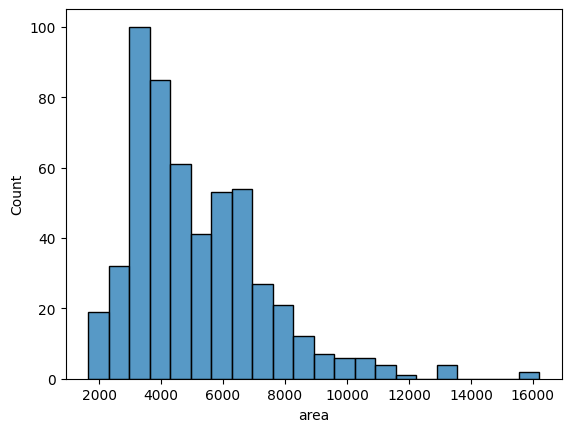

In [60]:
sns.histplot(data=records, x='area')

<Axes: xlabel='area'>

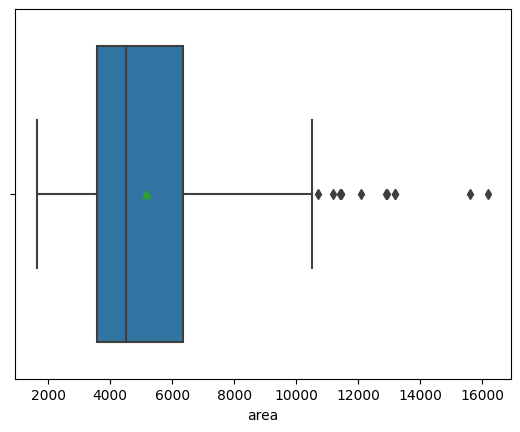

In [61]:
sns.boxplot(data=records, x='area', showmeans=True)

Area is skewed so we will replace missing data with median, a bit later.

In [ ]:
#Write your code below to explore the variable price, same way we summarise and visualise area


count        545
mean     4766729
std      1870440
min      1750000
25%      3430000
50%      4340000
75%      5740000
max     13300000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

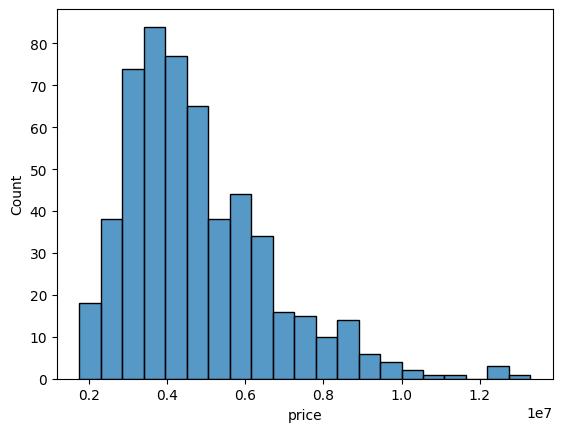

In [ ]:
#your code

<Axes: xlabel='price'>

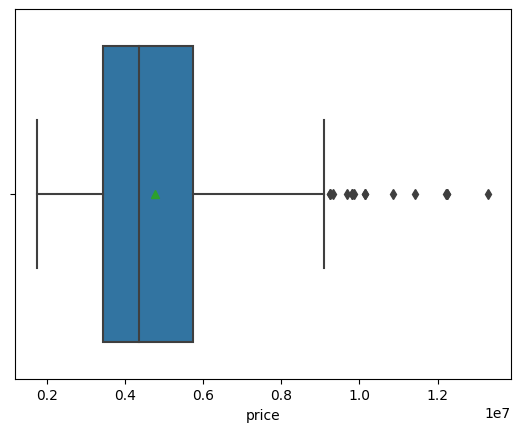

In [ ]:
#your code

<Axes: xlabel='furnishingstatus', ylabel='count'>

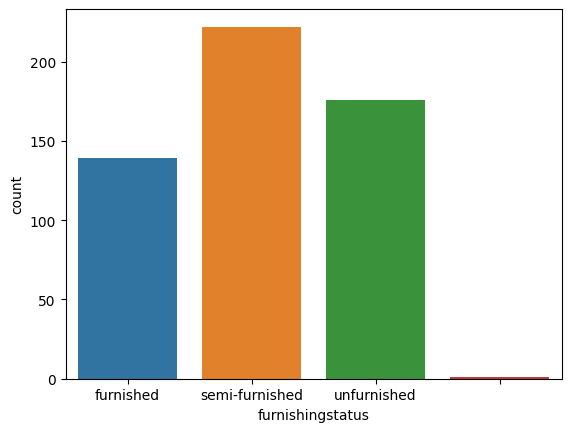

In [62]:
#describe categorical variables
sns.countplot(data=records, x='furnishingstatus')

Mode is semi-furnished; Note the 'weird' category " " (a space)

<Axes: xlabel='mainroad', ylabel='count'>

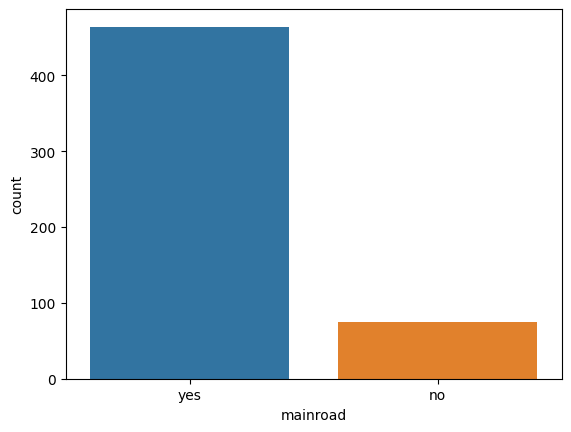

In [63]:
#write your code to visualise other ategorical variables, for example mainroad


In [ ]:
#you can also use the built-in function mode; it returns a series, so get the first index, there can be more than one mode

print(records['furnishingstatus'].mode()[0])
print(records['mainroad'].mode()[0])

**Visualise each numerical variable using a loop**

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records, x=variable)
    plt.title(f"Histogram of {variable}")
    plt.show()



**Explore each categorical variable**

In [66]:
#explore each categorial variable
print(records['furnishingstatus'].value_counts())


semi-furnished    222
unfurnished       176
furnished         139
                    1
Name: furnishingstatus, dtype: int64


In [67]:
#find mode
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

Furnishing Status mode:  0    semi-furnished
Name: furnishingstatus, dtype: object


Do it yourself for other categorical variables

In [68]:
#explore other categorial variables, for example bathrooms.


1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64


<Axes: xlabel='bathrooms', ylabel='count'>

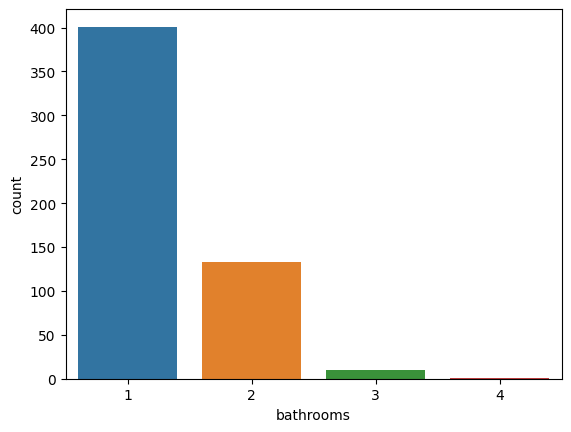

In [69]:
#Using seaborn to view the barchart
sns.countplot(x=records['bathrooms'])

**Visualise multiple categorical variables**

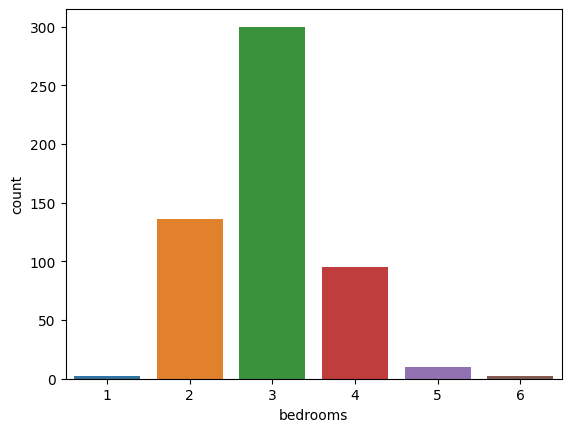

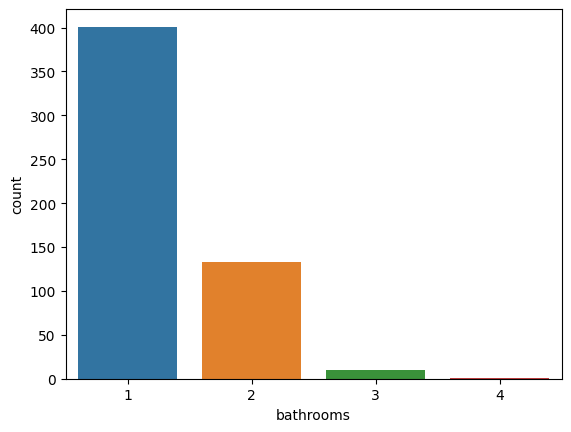

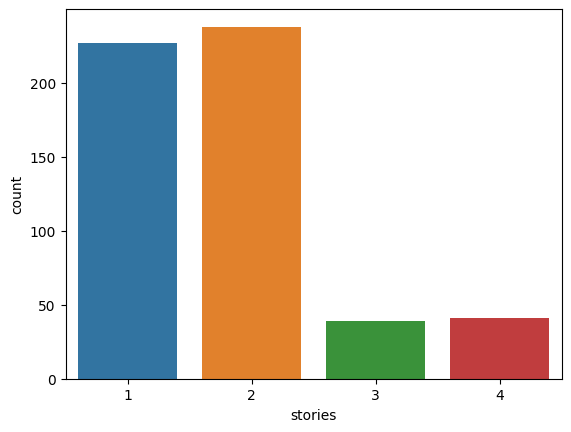

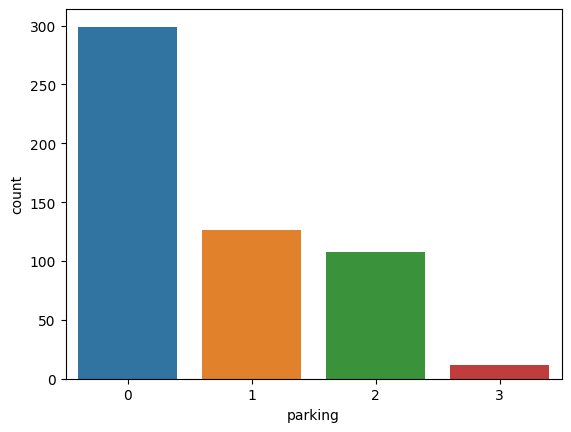

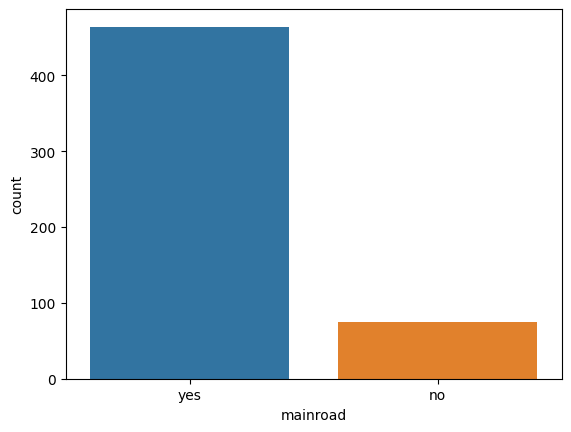

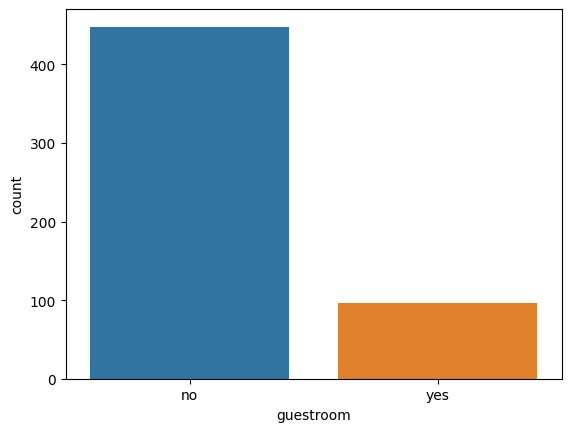

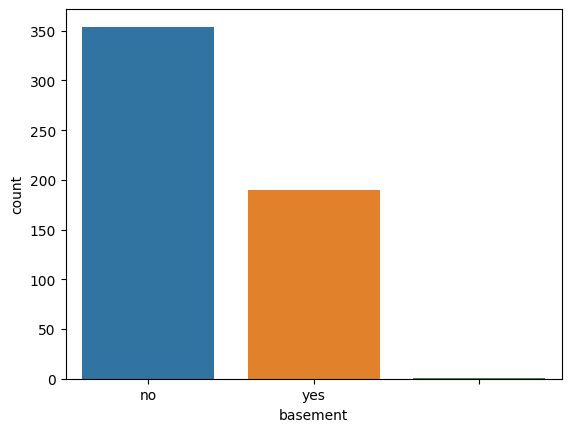

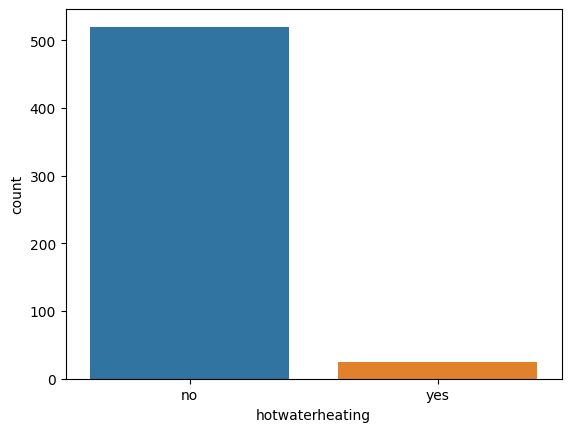

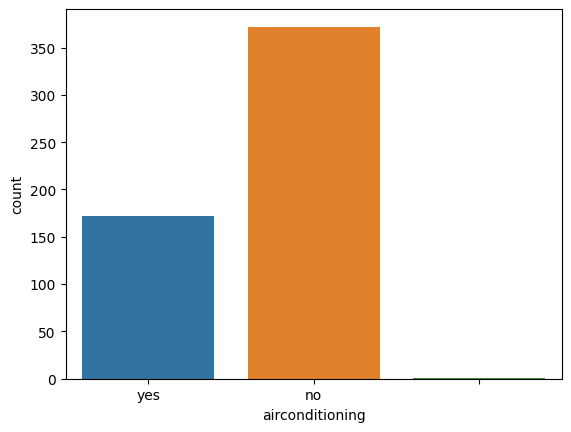

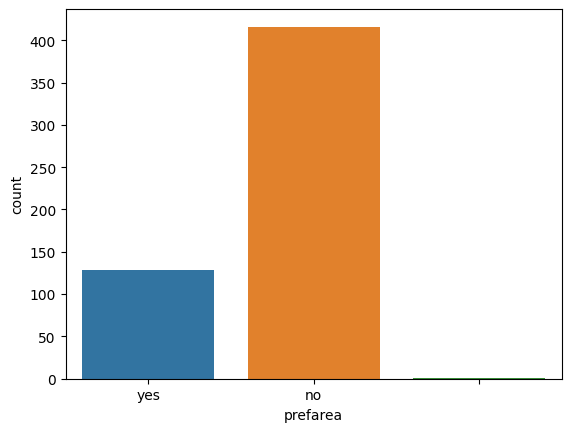

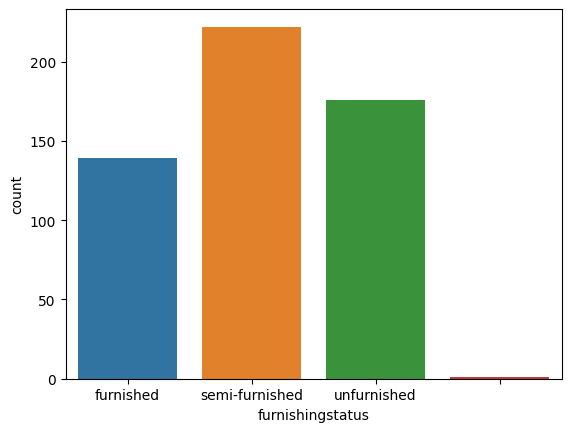

In [70]:
cat_variables = ['bedrooms', 'bathrooms','stories', 'parking','mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=records[i])


Note spaces are included in some catagorical variables. They should be treated as missing data.

### **1.5.3 Treat missing data**

In [71]:
# Replace empty strings (" ") with NaN
records.replace(" ", pd.NA, inplace=True)

In [ ]:
print(records.isnull().sum().sort_values(ascending=0))

In [73]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].median(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #note, there can be more than one mode

#do it yourself for other missing data
records['mainroad'].fillna(records['mainroad'].mode()[0], inplace=True)
records['basement'].fillna(records['basement'].mode()[0], inplace=True)
records['airconditioning'].fillna(records['airconditioning'].mode()[0], inplace=True)
records['prefarea'].fillna(records['prefarea'].mode()[0], inplace=True)

In [ ]:
print(records.isnull().sum().sort_values(ascending=0))

Now, rerun the analyses above with the cleansed dataset

### **1.5.2 Multivariate visualisation**

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='prefarea', ylabel='count'>

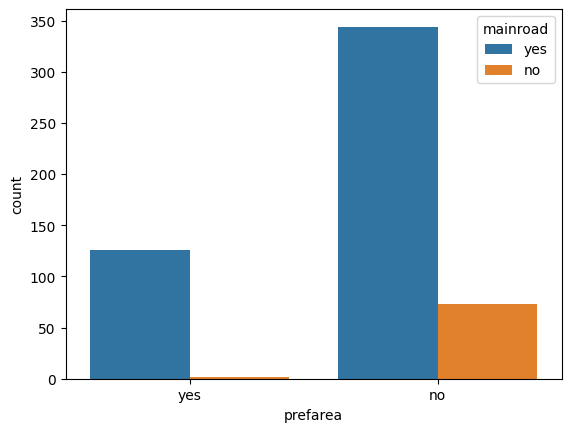

In [75]:
sns.countplot(data=records, x='prefarea', hue='mainroad')

<Axes: xlabel='furnishingstatus', ylabel='count'>

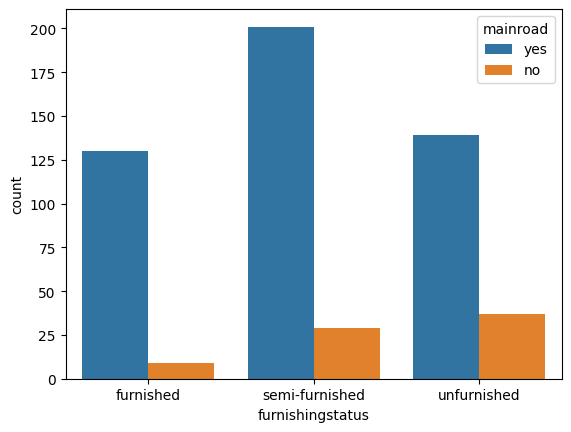

In [77]:
#Do it yourself for other categorical variables, for example x='furnishingstatus', hue='mainroad'



**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='price', ylabel='furnishingstatus'>

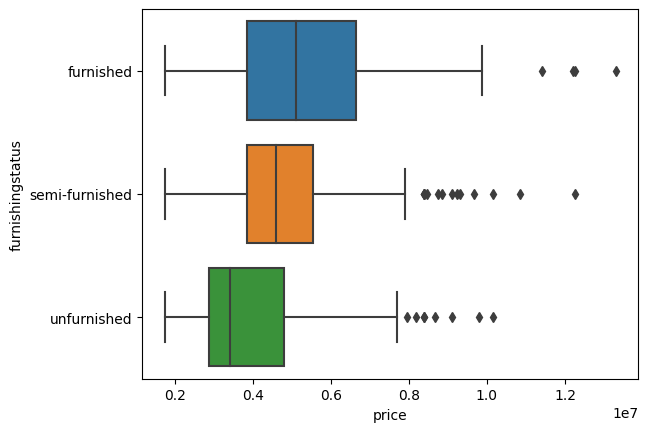

In [78]:
sns.boxplot(data=records, x='price', y='furnishingstatus')

<Axes: xlabel='price', ylabel='prefarea'>

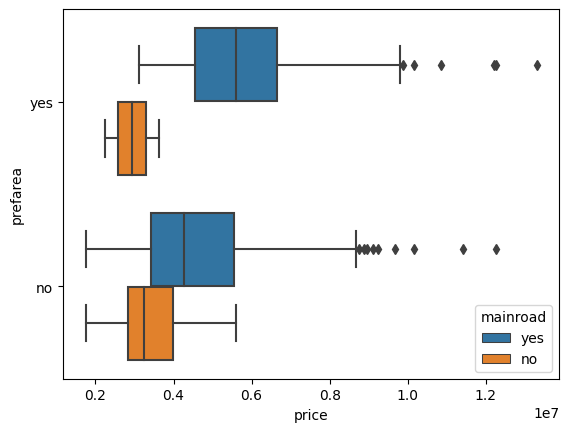

In [80]:
#Do it yourself for other variables, hint: using x=  y= and hue=



**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
sns.scatterplot(data=records, x='area', y='price')

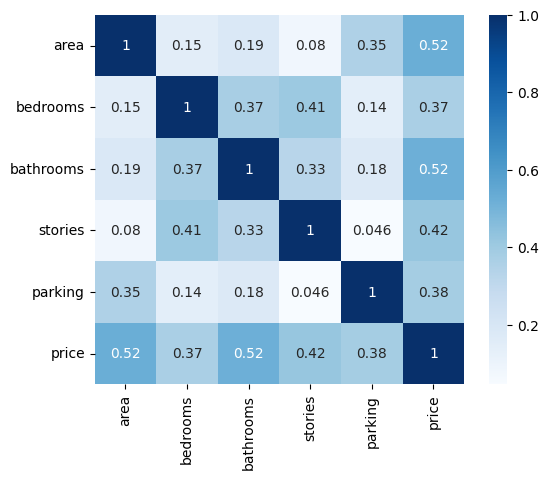

In [82]:
#generate heatmaps to explore relationships
sns.heatmap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


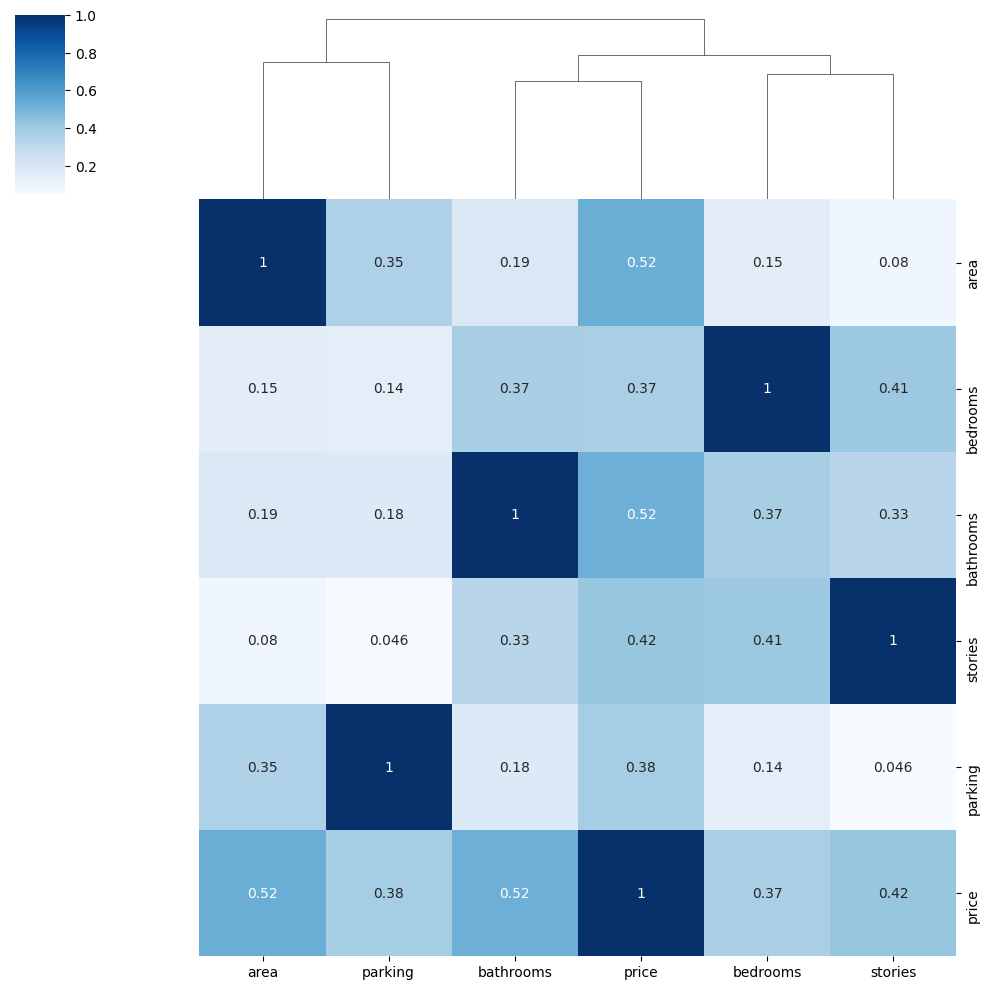

In [21]:
#generate dendrograms to show hierarchical clustering
sns.clustermap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **1.7 Encoding data**

In [83]:
#OPTIONAL: If you want to to optional exercises to explore different ways to convert data, then store our datasets for our explorations
records1=records
records2=records

In [ ]:
print(records.info())

In [85]:
#convert categorical variables to numeric
# Define the custom mapping
furnishing_mapping = {
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}
# Convert the categories to numerical values using replace()
records['furnishingstatus_N'] = records['furnishingstatus'].replace(furnishing_mapping)

In [86]:
other_cat_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert categorical variables into numeric using dummy encoding
records = pd.get_dummies(records, columns=other_cat_variables, drop_first=True)

In [ ]:
records.info()

In [ ]:
records.head()

### **Optional exercises**

**Option 2 to encode data**
Do this with the copy records1


In [89]:
#Last week, we learned to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records1['mainroad_N'] = encoder.fit_transform(records1['mainroad'])
records1['basement_N'] = encoder.fit_transform(records1['basement'])


In [ ]:
#there are other ways of doing this, for example
records1['hotwaterheating_N'] = records1['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)

records1.sample(10)

In [ ]:
#another way, defining your OWN function
#convert categorical data to numerical
def coding_furnishingstatus(x):
        if x=='furnished': return 3
        if x=='semi-furnished': return 2
        if x=='unfurnished': return 1

records1['furnishingstatus_N2'] = records1['furnishingstatus'].apply(coding_furnishingstatus)

records1.iloc[9:14]

In [ ]:
#write code to drop redudant columns if you don't like this option
records1= records1.drop(['mainroad_N','basement_N','hotwaterheating_N','furnishingstatus_N2'], axis=1)
print(records1.info())

**Option 3 to convert data types**
Do this on the copy records2

In [ ]:
#Another way is getting all catagorical columns
cat_variables = records2.select_dtypes(include=['object']).columns
#Convert categorical columns to numeric
records2[cat_variables] = records2[cat_variables].apply(encoder.fit_transform)

# Display the updated dataset
records2.head()

**Moving columns and accessing rows**

In [94]:
#Let't move price to the first column
first_column=records.pop('price')
records.insert(0,'price',first_column)

In [ ]:
records

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420.000,4,2,3,2,furnished,2,1,0,0,0,1,1
1,12250000,8960.000,4,4,4,3,furnished,2,1,0,0,0,1,0
2,12250000,9960.000,3,2,2,2,semi-furnished,1,1,0,1,0,0,1
3,12215000,7500.000,4,2,2,3,furnished,2,1,0,1,0,1,1
4,11410000,7420.000,4,1,2,2,furnished,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.000,2,1,1,2,unfurnished,0,1,0,1,0,0,0
541,1767150,2400.000,3,1,1,0,semi-furnished,1,0,0,0,0,0,0
542,1750000,3620.000,2,1,1,0,unfurnished,0,1,0,0,0,0,0
543,1750000,2910.000,3,1,1,0,furnished,2,0,0,0,0,0,0


In [ ]:
records.iloc[9:14]

## **1.8 Select features and target**

In [ ]:
#feature selection
features=['area']
X=records[features]
X.head()

In [ ]:
#specify the label
y=records['price']
y.head()

## **1.9 Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


## **1.10 Training a Linear Regression Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Linear Regression https://scikit-learn.org/stable/modules/linear_model.html

LinearRegression will take in its fit method arrays X, y and will store the coefficients of the linear model in its coef_ member






In [99]:
#import linear_model
from sklearn import linear_model

#create a linear_model object
reg = linear_model.LinearRegression()

**Train a model**

In [100]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

**Make predictions using the model and the test set**

In [101]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test)


**Inspect the predictions and the original labels**

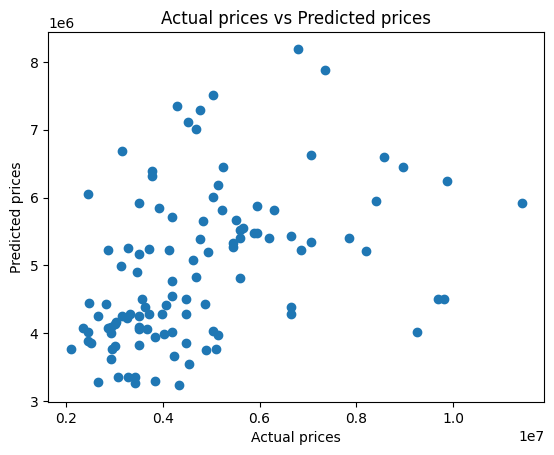

In [102]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

**Getting the Intercept and Coefficients**

In [ ]:
print('%.2f' % reg.intercept_)
print('%.2f' % reg.coef_)
print('Price = ', '%.2f' % reg.intercept_, ' + ', '%.2f' % reg.coef_, ' * ', 'Area' )


<Axes: xlabel='Area', ylabel='Predicted'>

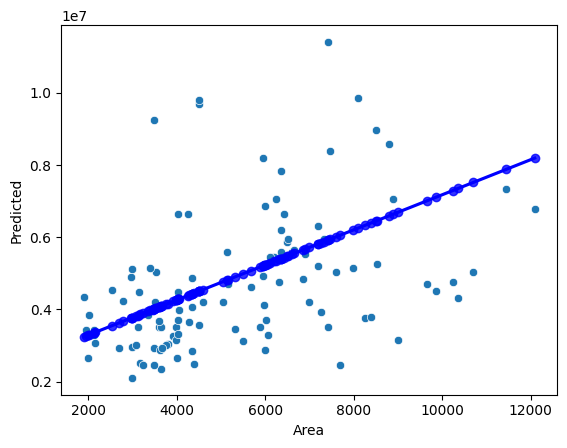

In [105]:
sns.scatterplot(data=inspection, x='Area', y='Actual')
sns.regplot(data=inspection, x='Area', y='Predicted', color='blue')

## **1.11 Performance evaluation**

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.13


In [106]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 1310218


In [107]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1754838


In [108]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count        109
mean     4721436
std      1893118
min      2100000
25%      3430000
50%      4235000
75%      5523000
max     11410000
Name: Actual, dtype: float64

In [109]:
#Examine the performance using the descriptive stats of predicted price
inspection['Predicted'].describe()

count       109
mean    4928291
std     1119384
min     3238092
25%     4062514
50%     4548898
75%     5649098
max     8191915
Name: Predicted, dtype: float64

## **1.12 Multi-linear regression**
Repeat from the feature selection steps to create multiple linear regression model

### **1.12.1 Select features**

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(records[numerical_variables].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#write code to show info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   area                 545 non-null    float64
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   parking              545 non-null    int64  
 6   furnishingstatus     545 non-null    object 
 7   furnishingstatus_N   545 non-null    int64  
 8   mainroad_yes         545 non-null    uint8  
 9   guestroom_yes        545 non-null    uint8  
 10  basement_yes         545 non-null    uint8  
 11  hotwaterheating_yes  545 non-null    uint8  
 12  airconditioning_yes  545 non-null    uint8  
 13  prefarea_yes         545 non-null    uint8  
dtypes: float64(1), int64(6), object(1), uint8(6)
memory usage: 37.4+ KB


In [111]:
#select relevant features and train and evaluate a model. For example
features=['area','bedrooms', 'bathrooms','stories', 'parking','mainroad_yes','guestroom_yes','basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_N']
X=records[features]

In [112]:
#specify the label
y=records['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### **1.12.2 Split data**

In [113]:
from sklearn.model_selection import train_test_split # Import train_test_split function
#import linear_model
from sklearn import linear_model

In [ ]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


### **1.12.3. Train a linear model**

In [115]:
#Create a linear_model object, hint reg=


In [117]:
# Train a Regression model (regressor) with the training dataset, hint: fit(X_train, y_train)



### **1.12.4 Make predictions**
Make predictions using the model and the test set

In [118]:
#Make predictions for the test dataset, hint y_pred=



**Inspect the predictions and the original labels**

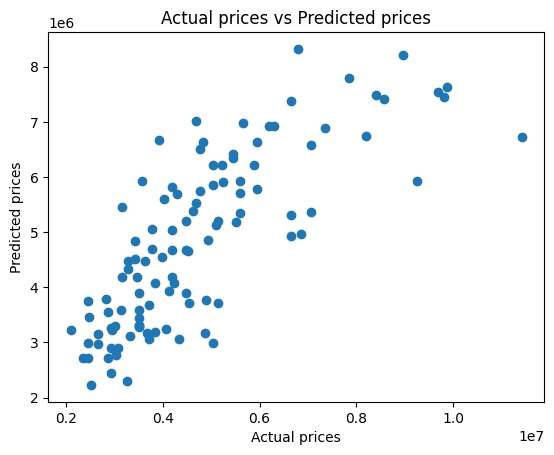

In [119]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

### **1.12.5 Performance evaluation**

In [121]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.61


In [122]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 888667


In [123]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1177787


In [124]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

count        109
mean     4721436
std      1893118
min      2100000
25%      3430000
50%      4235000
75%      5523000
max     11410000
Name: Actual, dtype: float64

In [125]:
#Examine the performance using the descriptive stats of predicted price
inspection['Predicted'].describe()

count       109
mean    4822460
std     1560780
min     2228858
25%     3310769
50%     4673476
75%     5932244
max     8321500
Name: Predicted, dtype: float64

In [ ]:
# Print the features and their coefficients
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Add a constant "intercept" to the predictors and calculate VIF
X_vif = X.copy()
X_vif['intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs to two decimal places
for index, row in vif.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso(alpha=1.0)

# Fit the model using the training data
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Print the features and their coefficients
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


# **Task 2: Insurance cost estimation**

**Do it yourself:** Repeat the above steps with the insurance dataset to consilidate your learning

## **2.1 Import libraries**

In [130]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

## **2.2 Load dataset**

In [131]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/Week%203/insurance.csv'

df = pd.read_csv(url)


## **2.3 EDA**

* How many rows and columns in the dataset?
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values?
* How to deal with categorical features?
* Any strong correlation from the dataset?  
* What are the stats for the `charges`? Plot overall distribution of `charges`; and ditribution of chareges for smoker and non-smokers. Practice more with `bmi`, `age` and `sex` variables.



In [ ]:
# How many rows and columns in the dataset?
df

# Return the first n rows.
df.head()

# What are the columns and their datatypes?
df.info()

# Is there any missing values?
df.isnull().sum()

# Any strong correlation from the dataset?
df.corr()

In [ ]:
# Correlation plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [134]:
# How to deal with categorical features?

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


In [ ]:
'''
What are the stats for the charges? Plot overall distribution of charges;
and ditribution of chareges for smoker and non-smokers.
'''
df.charges.describe()

In [ ]:
df.charges.hist(bins=50, figsize=(12,8))

In [ ]:
df.charges.hist(by=df.smoker, bins=50, figsize=(12,8))

In [ ]:
# Alternative using seaborn

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122, sharex = ax)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## **2.4 Select features and target**


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



In [139]:
X = df.drop(['charges'], axis = 1)
y = df.charges



## **2.5 Split data**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## **2.6 Model implementation**

1. Try with the original data. What's the performance?
2. Let's add data normalisation. Has the performance been improved?

In [141]:
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 37729580.5098492, MSE_Test: 31845929.13415943, MAE_Train: 4235.3838760320905, MAE_Test: 3930.3332739011403
R2 train data: 0.737, R2 test data: 0.800


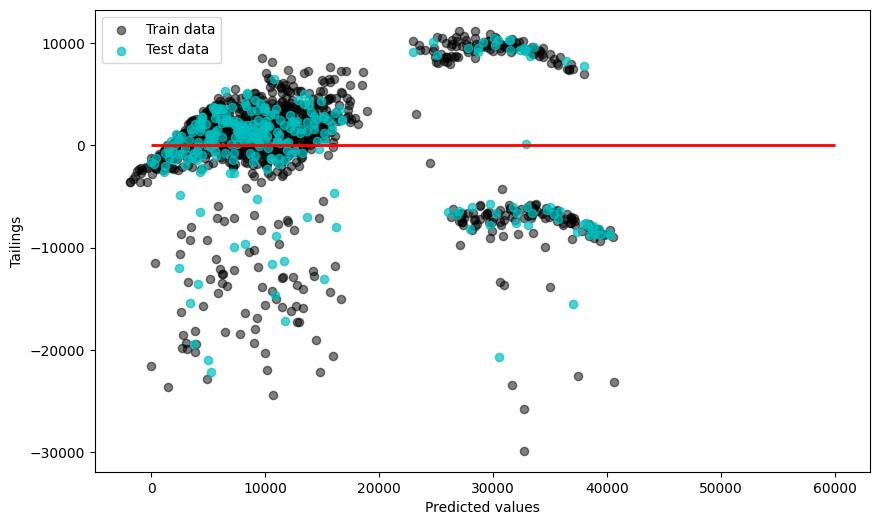

In [142]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [143]:
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state = 0)

plr = LinearRegression().fit(X_train, y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 26437340.35473178, MSE_Test: 21504212.79669052, MAE_Train: 3299.448925401869, MAE_Test: 3089.882598615672
R2 train data: 0.816, R2 test data: 0.865


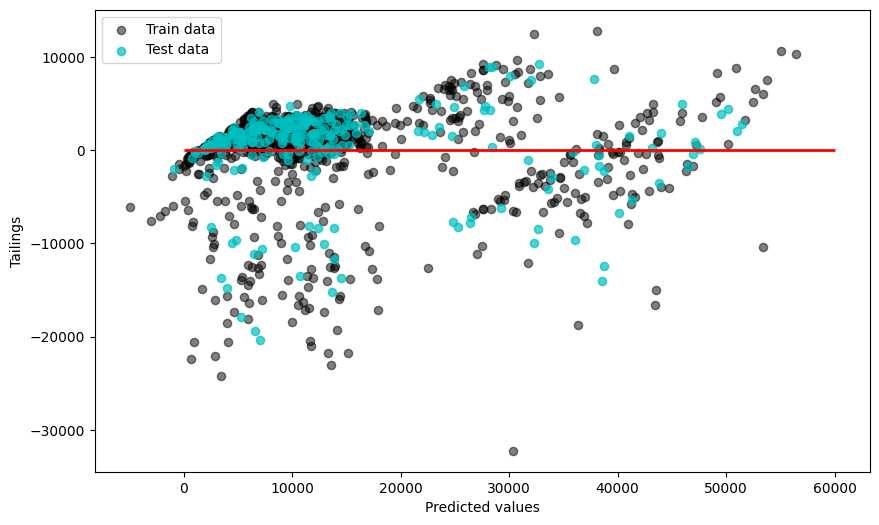

In [144]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()